<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Анализ-рынков-регионов" data-toc-modified-id="Анализ-рынков-регионов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ рынков регионов</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Анализ продаж продуктов для игровых консолей
<br>
<font color='DarkBlue'> 
📌 Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год. Из открытых источников доступны исторические данные до 2016 года включительно о продажах игр, оценки пользователей и экспертов, жанры и платформы
</font> 

## Изучение данных из файла

In [1]:
# Импорт библиотеки pandas
import pandas as pd
# Импорт библиотеки numpy
import numpy as np
# Импорт библиотеки matplotlib
import matplotlib.pyplot as plt
# Импорт библиотеки seaborn
import seaborn as sns
sns.set(palette='colorblind')
# Импорт библиотеки math
import math
# Импорт библиотеки scipy
from scipy.stats import norm
import scipy.stats
# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
# Удаление ложных предупреждений
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# Загрузка таблицы в память переменной df типа dataframe
df = pd.read_csv('/datasets/games.csv')
# Разделители для удобства отображения информации указаны в виде отдельных пунктов 'print("\033[1m\033[43m {}".format('----- Text -----'),"\033[0m")'
print("\033[1m\033[43m {}".format('----- Просмотр общей информации о dataframe -----'),"\033[0m")
df.info()
print("\033[1m\033[43m {}".format('----- Информация о заголовках полей dataframe -----'),"\033[0m")
print(df.columns)
print("\033[1m\033[43m {}".format('----- Информация о типах полей dataframe -----'),"\033[0m")
print(df.dtypes)
print("\033[1m\033[43m {}".format('----- Отображение на экране в читаемом виде первых записей таблицы dataframe для визуального анализа -----'),"\033[0m")
display(df.head())
print('Количество явных дубликатов',df.duplicated().sum())

 ----- Просмотр общей информации о dataframe ----- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
 ----- Информация о заголовках полей dataframe ----- 
Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Количество явных дубликатов 0


<font color='DarkBlue'> 
📌 Импортированы все библиотеки, используемые далее в проекте, и скорректированы настройки <br>
📌 В ходе первичного анализа данных сформированы следующие выводы: <br>
    
1. Присутсвует необходимость в редактировании заголовков, названия представлены не в условно общепринятом формате 'Змеиный регистр'. Необходимо привести наименования к нижнему регистру
2. Обнаружены пропуски в столбцах "Name", "Year_of_Release", "Genre", "Critic_Score", "User_Score", "Rating". Желательно заполнить их подходящими для соответствующих записей значениями, оставить текущие или, в противном случае, удалить
3. Явные дубликаты отсутствуют. Вероятность присутствия в таблице двух абсолютно одинаковых записей со всеми подобными параметрами крайне мала, поэтому при их наличии повторы было бы можно удалить
4. Тип данных полей "User_Score", а также некоторых числовых полей, необходимость отображения значений в виде дробных чисел у которых отсутствует, необходимо преобразовать, в дальнейшем можно уменьшить объем памяти для хранения данных
5. В данных таблицы некорректные значения не наблюдаются. Необходимо детально рассмотреть информацию о данных для каждого столбца
</font> 

In [3]:
df.columns = df.columns.str.lower()
display(df.describe())
display(df.describe(include = ['object','bool','datetime']))
for i in df.select_dtypes(include=['object','bool','datetime']):
    print('-----')
    if df[i].count() != len(df[i].unique()):
        print(df[i].value_counts())
    else:
        print('Все значения уникальны')

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


,name,platform,genre,user_score,rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


-----
Need for Speed: Most Wanted              12
Ratatouille                               9
LEGO Marvel Super Heroes                  9
FIFA 14                                   9
Madden NFL 07                             9
                                         ..
NBA                                       1
ATV Offroad Fury Pro                      1
Klonoa Heroes: Densetsu no Star Medal     1
Super Trucks Racing                       1
Final Fantasy VI Advance                  1
Name: name, Length: 11559, dtype: int64
-----
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64
-----
Action          3369
Sport

<font color='DarkBlue'> 
📌 В первом приближении все значения в пределах допустимых за исключением самого повторяющегося значения 'tbd' в поле 'user_score' <br>
📌 В дальнейшем предполагается, что данные о проданных копиях обозначены за весь период, то есть учитывается общее количество продаж указанных в исходной таблице продуктов <br>
📌 Необходимо также проанализировать отсутствующие значения полей <br>
</font>

## Предобработка данных

<font color='DarkBlue'> 
📌 Необходимо выполнить анализ значений поля 'user_score' и определить количество и виды текстовых значений <br>
</font>

In [4]:
print('Уникальные значения с текстовыми литералами в поле \'user_score\'', df[df['user_score'].str.isalpha() == True]['user_score'].unique())
print('Общее количество текстовых значений в поле \'user_score\'', df[df['user_score'].str.isalpha() == True]['user_score'].count())

Уникальные значения с текстовыми литералами в поле 'user_score' ['tbd']
Общее количество текстовых значений в поле 'user_score' 2424


<font color='DarkBlue'> 
📌 Установлено, что текстовым значением является только набор символов 'tbd', символизирующее о том, что значение еще не определено. Соответственно, можно заменить его пустым значением <br>
📌 Можно проверить, есть ли в пропущенных значениях какие-либо закономерности, коррелирующиеся с другими столбцами <br>    
</font>

In [5]:
df['user_score'] = df['user_score'].apply(pd.to_numeric, errors='coerce')
display(df[df['name'].isna()])
display(df[df['year_of_release'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<font color='DarkBlue'> 
📌 Выявлено, что отсутствующие значения в столбце 'name' связаны с таковыми в столбце 'genre'. По этим записям нельзя производить дальнейший конструктивный анализ, поэтому их лучше удалить <br>
📌 Пропусков в столбце 'year_of_release' немного, поэтому их можно заменить на усредненные значения для соответствующей платформы в соответствии с периодом ее жизненного цикла. Затем после заполнения всех пропущенных значений, скорее всего сформированных по ошибке, можно изменить тип значения поля на целочисленный <br>
📌 По возможности для заполнения пропусков в столбцах 'critic_score', 'user_score', 'rating' потребуется вычислить усредненные значения оценок и рейтингов для соответствующих игр. Для дальнейшего сравнения сначала можно посмотреть на данные самой часто встречающейся в исходной таблице игры <br>  
📌 Также можно проверить, есть ли нецелые значения в поле 'critic_score', чтобы определить, потребуется ли в дальнейшем производить манипуляции с округлением до одного знака после запятой <br>      
</font>

In [6]:
df = df[~df['name'].isna()].reset_index(drop=True)
df['year_of_release'] = round(df['year_of_release'].where(~df['year_of_release'].isna(), df.groupby('platform')['year_of_release'].transform('mean')))
df['year_of_release'] = df['year_of_release'].astype('int')
display(df[df['name'] == 'Need for Speed: Most Wanted'])
display(df[df['critic_score'] % 1 > 0])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1189,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1590,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1997,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2047,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3580,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5971,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6272,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6409,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


<font color='DarkBlue'> 
📌 Теперь можно заменить пропущенные значения усредненными для каждой повторяющейся игры и посмотреть на результат для рассматриваемой игры после преобразования. Используются не значения медиан, так как отсутствует явно прослеживающиеся выбивающиеся из основной массы значения рассматриваемых параметров <br>    
</font>

In [7]:
df['critic_score'] = round(df['critic_score'].where(~df['critic_score'].isna(), df.groupby('name')['critic_score'].transform('mean')))
df['user_score'] = round(df['user_score'].where(~df['user_score'].isna(), df.groupby('name')['user_score'].transform('mean')), 1)
df['rating'] = df['rating'].where(~df['rating'].isna(), df.groupby('name')['rating'].transform(lambda x: x.describe()['top']))
display(df[df['name'] == 'Need for Speed: Most Wanted'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,78.0,8.4,T
1189,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1590,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1997,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2047,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,78.0,8.4,T
3580,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5971,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6272,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,78.0,8.4,T
6409,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


<font color='DarkBlue'> 
📌 Наблюдается большое количество игр без рейтинга. Возможно в отсутствии прослеживается какая-либо закономерность. Поэтому для учета соответствующих показателей в дальнейшем анализе будет полезным обозначить их условным значением 'Unknown' <br>       
📌 Для последующего анализа необходимо посчитать суммарные продажи во всех регионах и записать их в отдельный столбец <br>    
</font>

In [8]:
df['rating'] = df['rating'].fillna('Unknown')
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,Unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,Unknown,28.31


<font color='DarkBlue'> 
📌 Заметно, что в исходном датафрейме игры отсортированы по популярности. Достаточно близким к этому показателю является общее количество продаж, но не исключено также влияние других факторов <br> 
📌 Можно удостовериться в том, что в наличие всех данных характерно для одних и тех же записей <br>     
</font>

In [9]:
print('Количество записей с полноценными данными:', df[(~df['critic_score'].isna()) & (~df['user_score'].isna()) & (~df['rating'].isna())]['name'].count())

Количество записей с полноценными данными: 8353


<font color='DarkBlue'> 
📌 В завершение раздела по предобработке данных можно преобразовать типы данных рабочей таблицы до оптимальных по занимаемому объему памяти и вывести общую информацию по датасету <br>     
</font>

In [10]:
df[df.select_dtypes(include=['int']).columns] = df.select_dtypes(include=['int']).apply(pd.to_numeric,downcast='unsigned')
df[df.select_dtypes(include=['float']).columns] = df.select_dtypes(include=['float']).apply(pd.to_numeric,downcast='float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  uint16 
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float32
 5   eu_sales         16713 non-null  float32
 6   jp_sales         16713 non-null  float32
 7   other_sales      16713 non-null  float32
 8   critic_score     9098 non-null   float32
 9   user_score       8689 non-null   float32
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float32
dtypes: float32(7), object(4), uint16(1)
memory usage: 1012.0+ KB


## Исследовательский анализ данных

<font color='DarkBlue'> 
📌 Необходимо выполнить анализ по продажам игр и выявить найденные далее закономерности <br>     
📌 Требуется определить количество выпущенных игр в разные годы <br>     
</font>

In [11]:
np.linspace(df['year_of_release'].min() - 0.5, df['year_of_release'].max() + 0.5, num=df['year_of_release'].max() - df['year_of_release'].min() + 2)

array([1979.5, 1980.5, 1981.5, 1982.5, 1983.5, 1984.5, 1985.5, 1986.5,
       1987.5, 1988.5, 1989.5, 1990.5, 1991.5, 1992.5, 1993.5, 1994.5,
       1995.5, 1996.5, 1997.5, 1998.5, 1999.5, 2000.5, 2001.5, 2002.5,
       2003.5, 2004.5, 2005.5, 2006.5, 2007.5, 2008.5, 2009.5, 2010.5,
       2011.5, 2012.5, 2013.5, 2014.5, 2015.5, 2016.5])

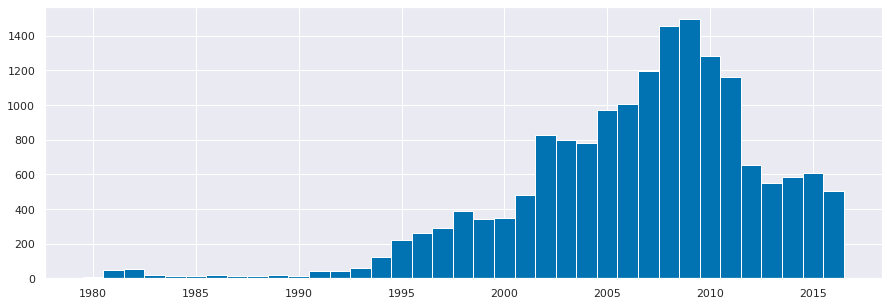

In [12]:
#df['year_of_release'].hist(bins=len(df['year_of_release'].unique()), figsize=(15,5))
#df['year_of_release'].hist(bins=len(range(df['year_of_release'].min(),df['year_of_release'].max()+1)), figsize=(15,5))
df['year_of_release'].hist(bins=np.linspace(df['year_of_release'].min() - 0.5, df['year_of_release'].max() + 0.5, num=df['year_of_release'].max() - df['year_of_release'].min() + 2), figsize=(15,5))
plt.show()

<font color='DarkBlue'> 
📌 Наблюдается нелинейная зависимость графика в правой части гистограммы, в левой - линейная по причине быстрого развития игровой индустрии для консолей. Касательно всех игровых платформ данные важны за все периоды, так как они не однородны. Заметно, что в 2005-2011 годах выпущенных игр из рассматриваемой выборки намного больше, чем за следующие года. Для анализа текущей ситуации рынка достаточно данныз за предшествующее десятилетие, остальные данные не актуальны в связи со сменой платформ и качества продуктов вследствие развития отрасли <br>     
📌 Теперь нужно посмотреть, как менялись продажи по платформам. Можно составить отсортированный список по количеству проданных копий игр для каждой из платформ, затем использовать его в дальнейших расчетах <br>     
</font>

In [13]:
df_platform = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
df_platform

platform
PS2     1255.770020
X360     971.419983
PS3      939.650024
Wii      907.510010
DS       806.119995
PS       730.859985
GBA      317.850006
PS4      314.140015
PSP      294.049988
PC       259.519989
3DS      259.000000
XB       257.739990
GB       255.460007
NES      251.050003
N64      218.679993
SNES     200.040009
GC       198.929993
XOne     159.319992
2600      96.980003
WiiU      82.190002
PSV       54.070000
SAT       33.590000
GEN       28.350000
DC        15.950000
SCD        1.860000
NG         1.440000
WS         1.420000
TG16       0.160000
3DO        0.100000
GG         0.040000
PCFX       0.030000
Name: total_sales, dtype: float32

<font color='DarkBlue'> 
📌 Исходя из данных списка выше, платформами с наибольшими суммарными продажами являются те, количество продаж которых более 250 млн. копий <br>    
📌 Необходимо построить распределение по годам для анализа продаж и определения аномалий, а также определить срок жизненного цикла платформ. По количеству выпущенных игр можно судить о периоде актуальности платформы <br>     
</font>

PS2
Длительность продажи продуктов для платформы: 12


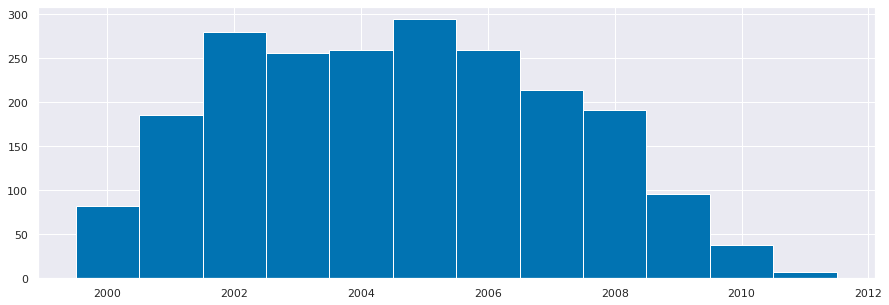

X360
Длительность продажи продуктов для платформы: 12


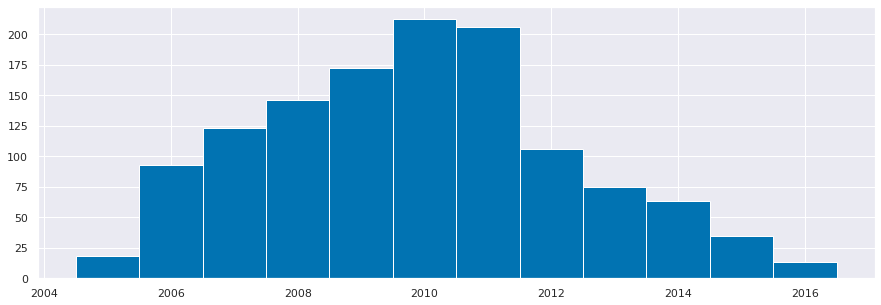

PS3
Длительность продажи продуктов для платформы: 11


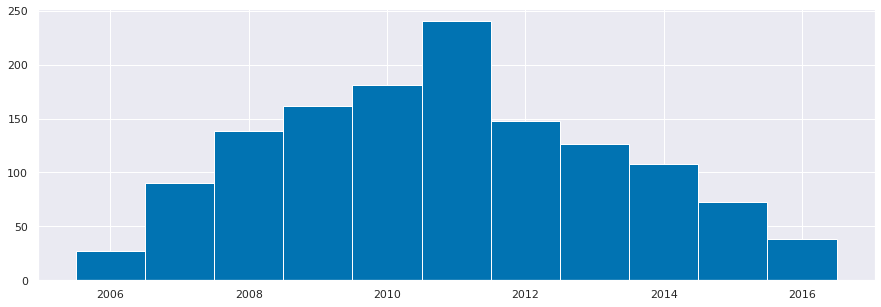

Wii
Длительность продажи продуктов для платформы: 11


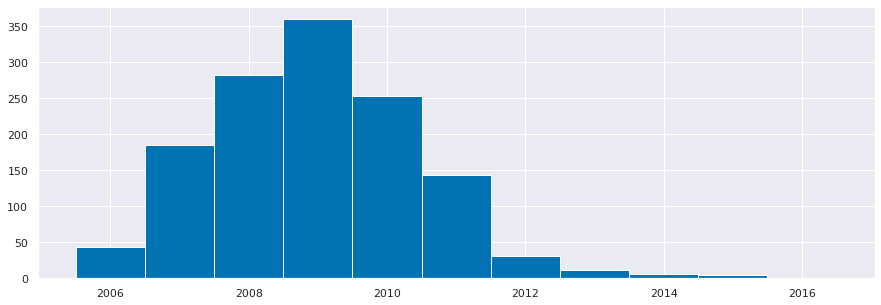

DS
Длительность продажи продуктов для платформы: 29


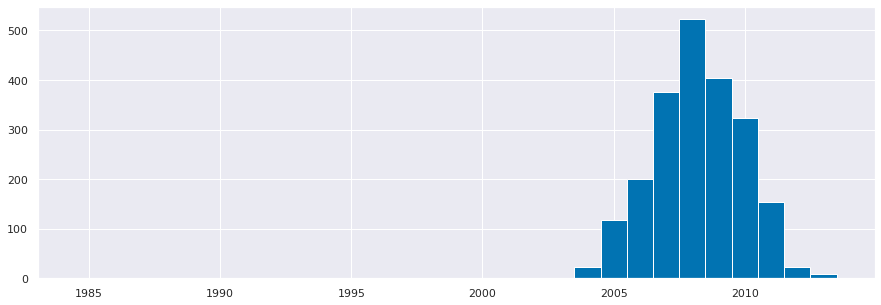

PS
Длительность продажи продуктов для платформы: 10


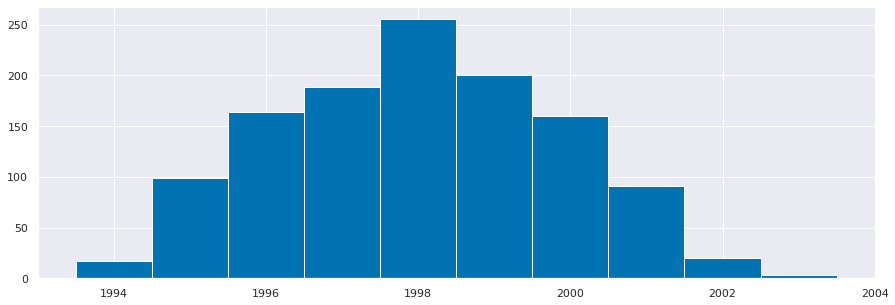

GBA
Длительность продажи продуктов для платформы: 8


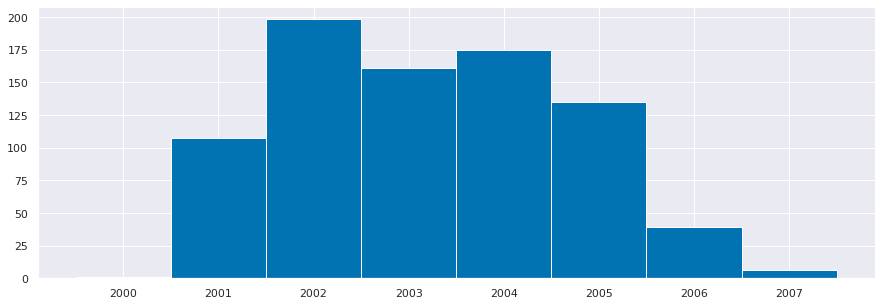

PS4
Длительность продажи продуктов для платформы: 4


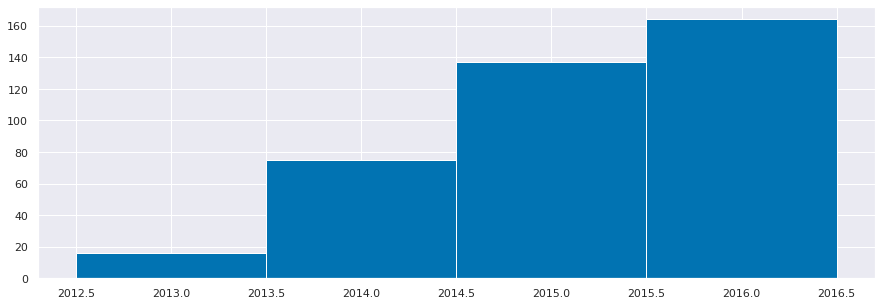

PSP
Длительность продажи продуктов для платформы: 12


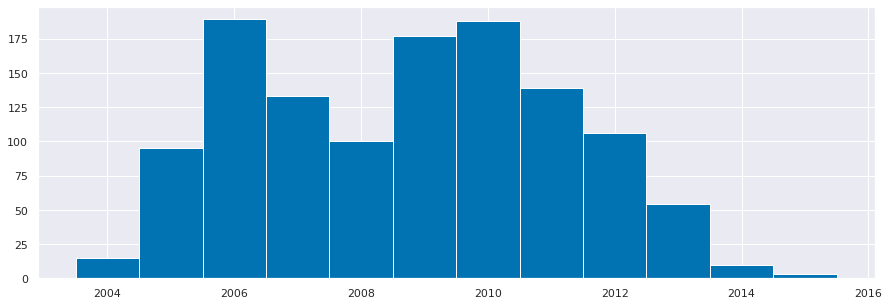

PC
Длительность продажи продуктов для платформы: 32


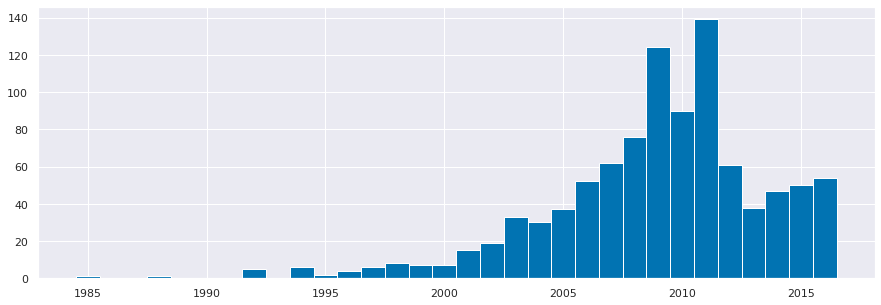

3DS
Длительность продажи продуктов для платформы: 6


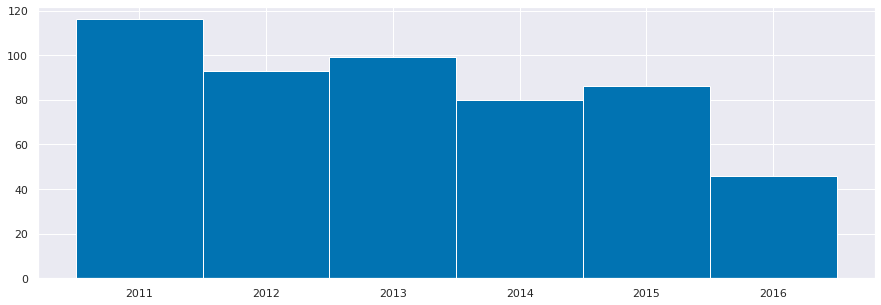

XB
Длительность продажи продуктов для платформы: 9


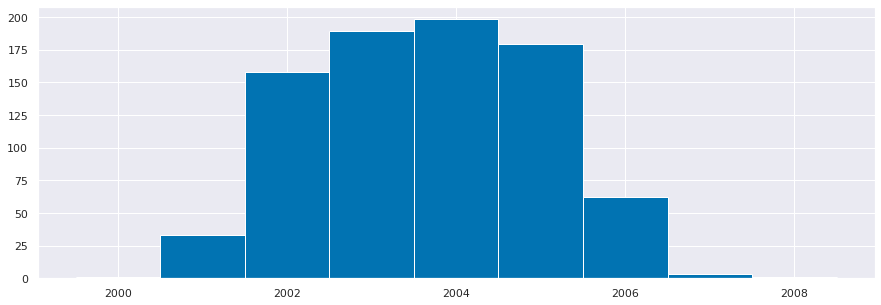

GB
Длительность продажи продуктов для платформы: 14


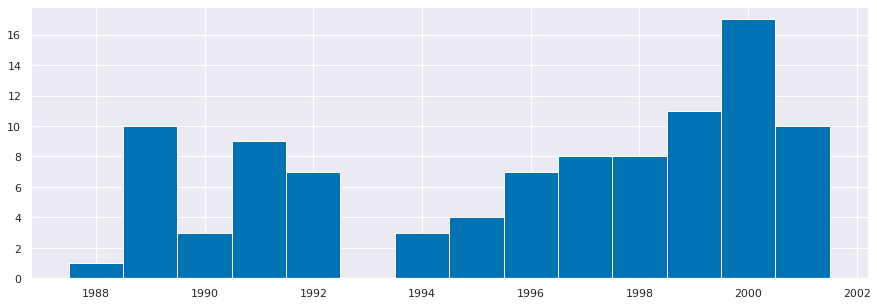

NES
Длительность продажи продуктов для платформы: 12


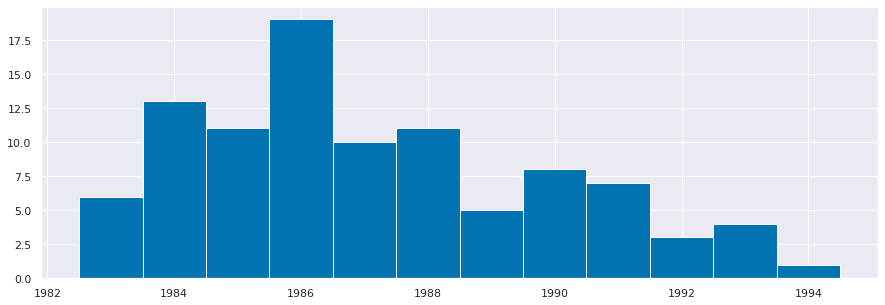

N64
Длительность продажи продуктов для платформы: 7


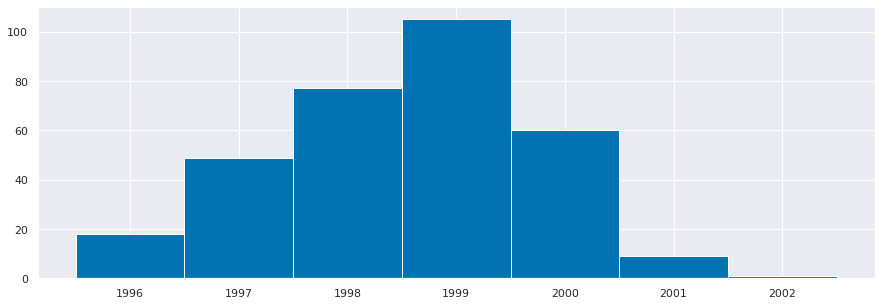

SNES
Длительность продажи продуктов для платформы: 10


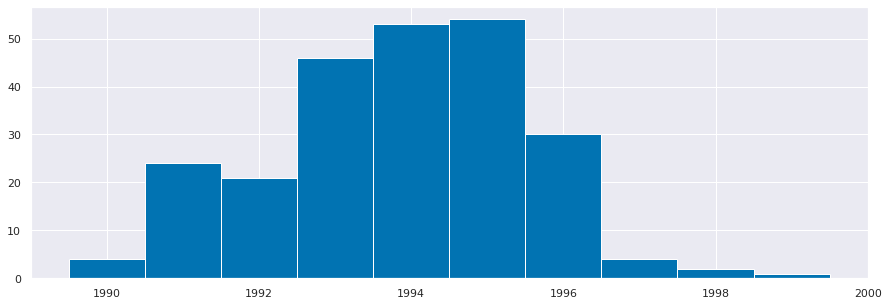

GC
Длительность продажи продуктов для платформы: 7


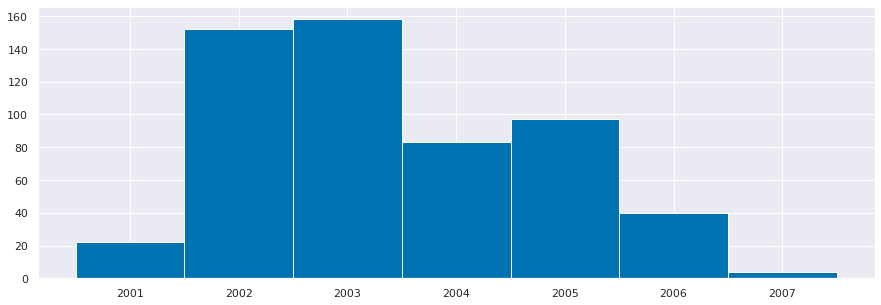

XOne
Длительность продажи продуктов для платформы: 4


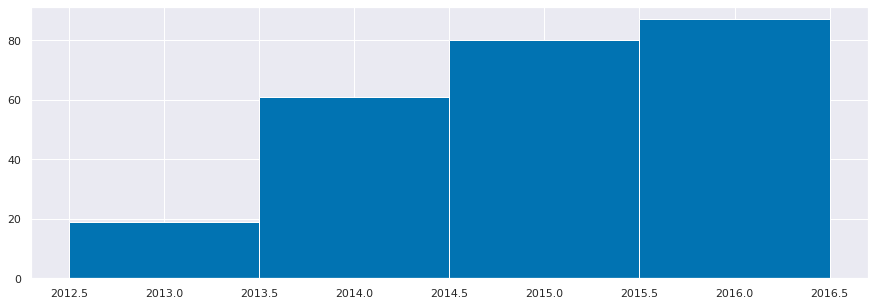

2600
Длительность продажи продуктов для платформы: 10


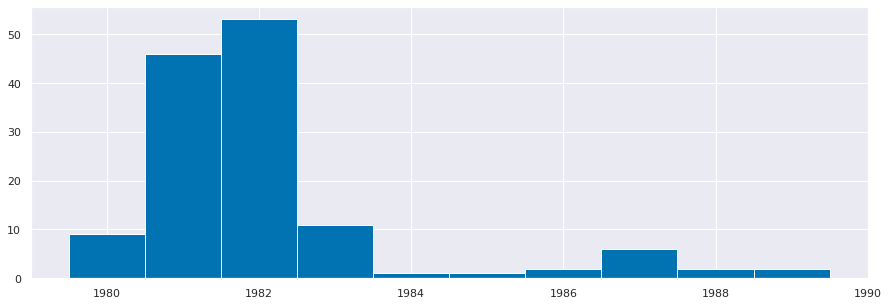

WiiU
Длительность продажи продуктов для платформы: 5


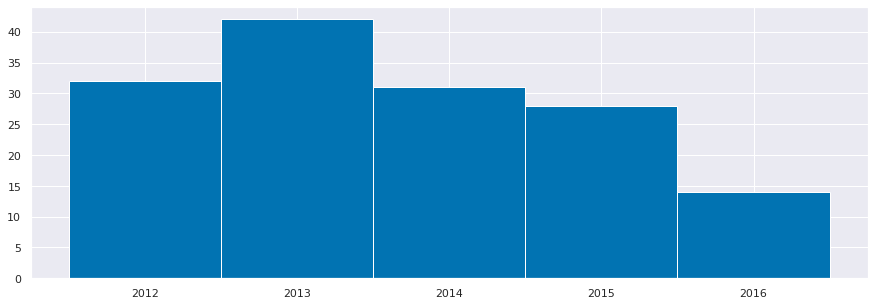

PSV
Длительность продажи продуктов для платформы: 6


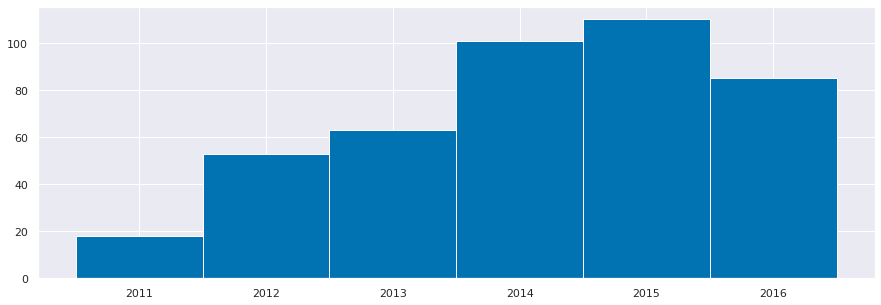

SAT
Длительность продажи продуктов для платформы: 6


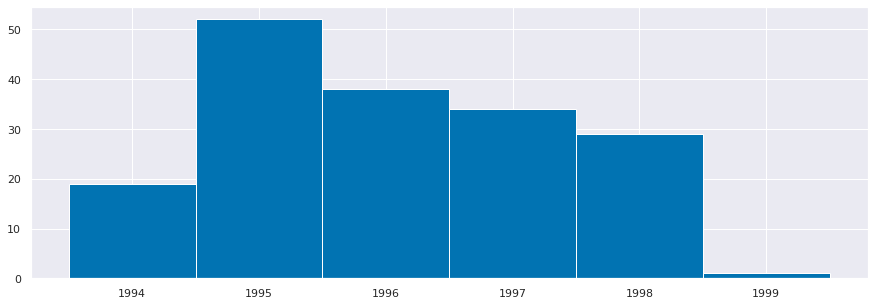

GEN
Длительность продажи продуктов для платформы: 5


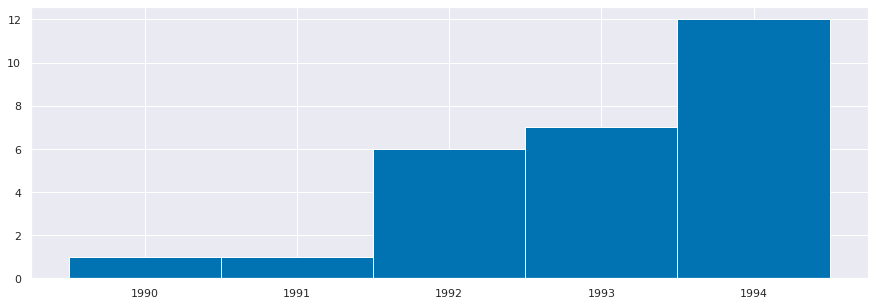

DC
Длительность продажи продуктов для платформы: 11


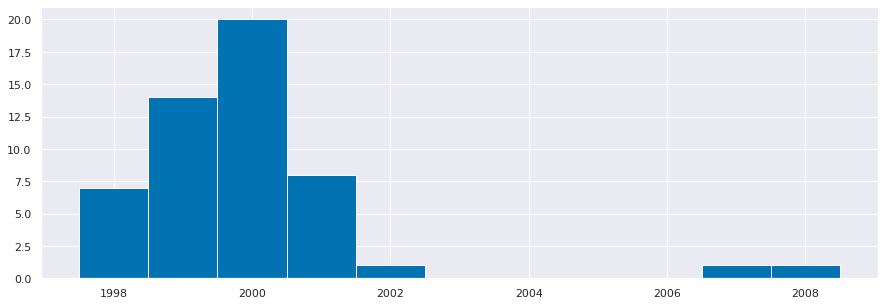

SCD
Длительность продажи продуктов для платформы: 2


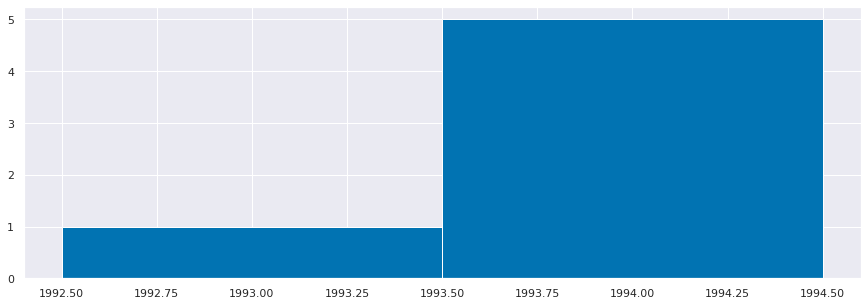

NG
Длительность продажи продуктов для платформы: 4


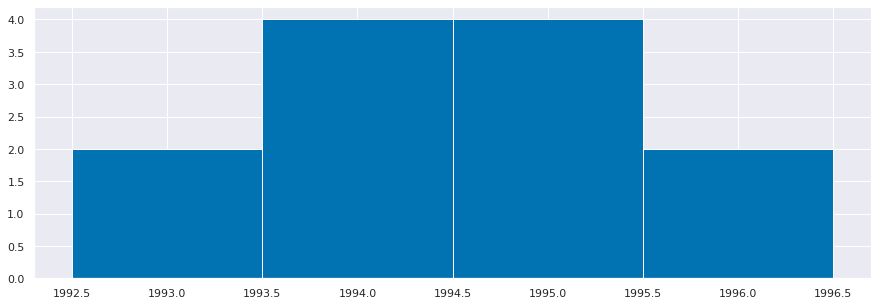

WS
Длительность продажи продуктов для платформы: 3


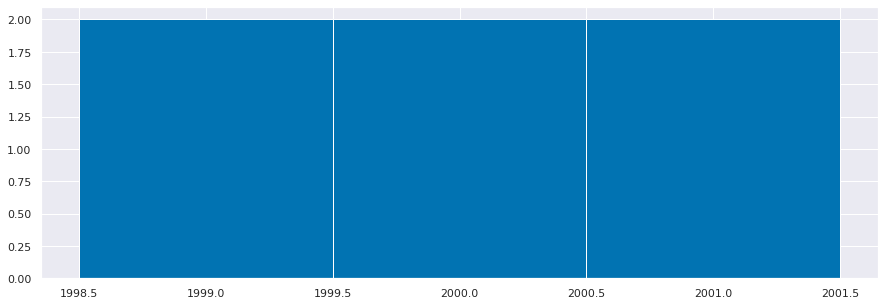

TG16
Длительность продажи продуктов для платформы: 1


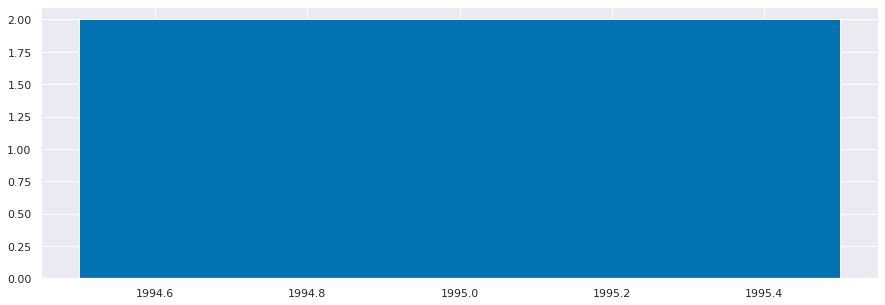

3DO
Длительность продажи продуктов для платформы: 2


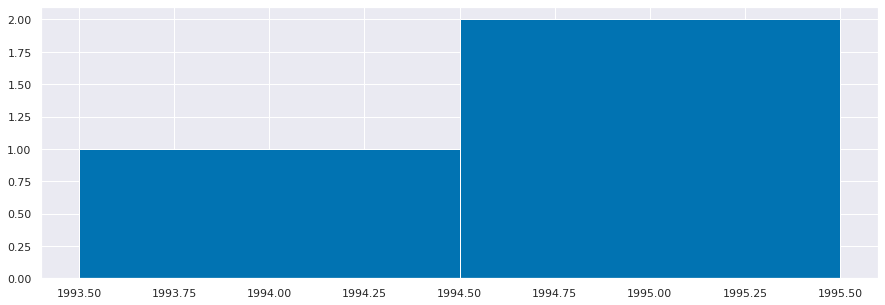

GG
Длительность продажи продуктов для платформы: 1


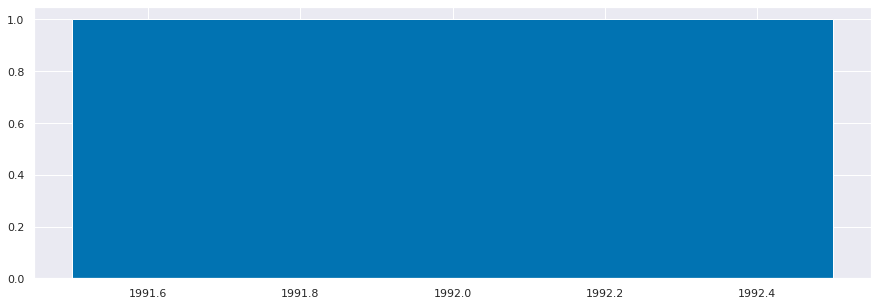

PCFX
Длительность продажи продуктов для платформы: 1


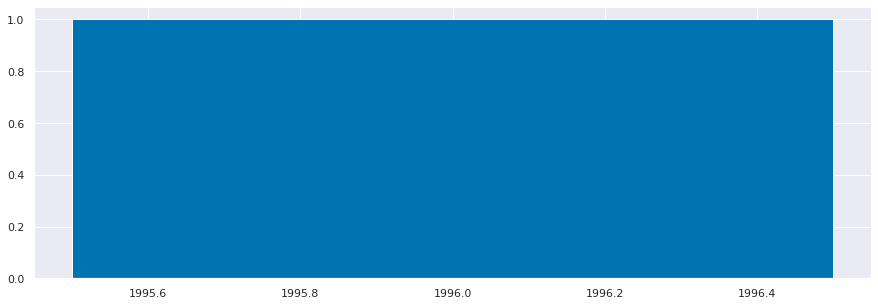

In [14]:
#df_platform = df_platform[df_platform > df_platform.median()]
cnt = 0
for i in df_platform:
    print(df_platform.index[cnt])
    period = np.linspace(df[df['platform'] == df_platform.index[cnt]]['year_of_release'].min() - 0.5, df[df['platform'] == df_platform.index[cnt]]['year_of_release'].max() + 0.5, num=df[df['platform'] == df_platform.index[cnt]]['year_of_release'].max() - df[df['platform'] == df_platform.index[cnt]]['year_of_release'].min() + 2)  
    print('Длительность продажи продуктов для платформы:', len(period) - 1) 
    df[df['platform'] == df_platform.index[cnt]]['year_of_release'].hist(bins=period, figsize=(15,5))
    plt.show()
    cnt += 1

<font color='DarkBlue'> 
📌 Обнаружены аномальные выбросы для платформы DS: есть продукт, выпущенный в 1985 году, хотя платформы еще не существовало (релиз был в 2004 году), следовательно, необходимо заменить значение на медианное, чтобы не учитывать выброс в расчете, для соответствующей платформы <br>    
📌 Самой продаваемой платформой является PlayStation: продажи игр для PS производились с 1994 по 2003 включительно, для PS2 с 2000 по 2011 года, для PS3 с 2006 по н.в., а для PS4 с 2013 по н.в. <br>     
📌 Платформой, имеющей самый длительный цикл продаж - с 1985 по н.в., является PC, так как не отдельно учитываются ее всевозможные модификации. У нее не так много продаж в сравнении с лидерами, так как для PC имеется множество версий игр с обходом защиты лицензии, соответственно присутствует возможность свободного доступа к использованию их копий <br>  
📌 Можно определить среднее значеник жизненного цикла всех платформ и наиболее популярных из них <br>     
</font>

In [15]:
df.loc[(df['platform'] == 'DS') & (df['year_of_release'] == 1985),'year_of_release'] = int(df[df['platform'] == 'DS']['year_of_release'].median())
print('Жизненный цикл всех платформ:',int((df.groupby('platform')['year_of_release'].max() - df.groupby('platform')['year_of_release'].min() + 1).mean()))
print('Жизненный цикл наиболее популярных платформ:',int((df[df['platform'].isin(df_platform[df_platform > df_platform.median()].index.unique())].groupby('platform')['year_of_release'].max() - df[df['platform'].isin(df_platform[df_platform > df_platform.median()].index.unique())].groupby('platform')['year_of_release'].min() + 1).mean()))

Жизненный цикл всех платформ: 8
Жизненный цикл наиболее популярных платформ: 11


<font color='DarkBlue'> 
📌 Срок жизни платформ в среднем около 8 лет, для наиболее популярных платформ с количеством суммарных продаж более 200 млн. копий немногим более 10 лет. Наиболее точный анализ осуществляется при большем количестве данных, то есть проданных копий и, соответственно, более популярных платформ <br>    
📌 Дальнейшие расчеты в разделе исследовательского анализа предполагают данные за соответствующий актуальный период с 2012 года, с начала которого стабилизировалось количество продаж, то есть 5 предшествующих данным исходной выборки лет. Платформы, игры для которых создавались и в 2016 году являются актуальными. Эти данные помогут построить прогноз на 2017 год. Данные за предыдущие годы учитываться не будут <br>         
</font>

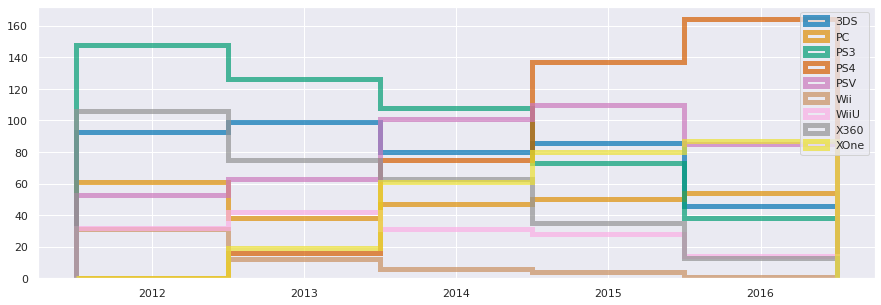

In [16]:
df_actual = df[(df.groupby('platform')['year_of_release'].transform('max') == 2016) & (df['year_of_release'] > 2011)]
df_actual_platform = df_actual.groupby('platform')['total_sales'].sum()
cnt = 0
for i in df_actual_platform :
    df_actual[df_actual['platform'] == df_actual_platform .index[cnt]]['year_of_release'].hist(bins=np.linspace(2011.5, 2016.5, num=6), label=df_actual_platform .index[cnt], edgecolor = sns.color_palette('colorblind')[cnt], linewidth = 5, alpha = 0.7, fill = False, histtype = 'step', figsize=(15,5))
    cnt += 1
plt.legend()
plt.show()

<font color='DarkBlue'> 
📌 В 2016 году лидром продаж среди платформ является PS4. Раст наблюдается у продуктов для платформ PS4 и XOne, являющихся потенциально прибыльными, как и их следующие поколения. Продажи игр платформ PC стабильны. У игр для остальных, как видно из графика, продажи стабильно падают - X360 и PS3 (так как на замену пришли XOne и PS4 соответственно), 3DS, Wii и WiiU (портативные платформы постепенно отходят на второй план). Касательно PSV однозначный вывод сделать нельзя, так как, возможно, игр в 2016 году может быть меньше по иной причине, данные за этот год могут быть неполными, стабильно спадающей тенденции не наблюдается и появляется новое поколение данной платформы - PS2000. Но скорее всего продажи PSV продолжат падать, так как определяется резкое снижение выпущенных продуктов <br>    
📌 Можно построить график 'ящик с усами' по глобальным продажам игр в разбивке по платформам и проанализировать его <br>       
</font>

(0.0, 9.523439811706153)

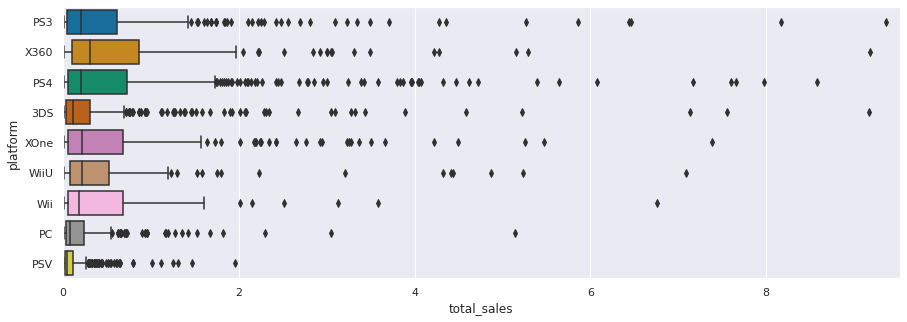

In [17]:
plt.figure(figsize = (15,5))
sns.boxplot(data=df_actual, x='total_sales', y='platform')
plt.xlim(df['total_sales'].min(),df['total_sales'].quantile(0.996))

<font color='DarkBlue'> 
📌 Для удобства можно построить более детальный график 'ящик с усами' по глобальным продажам игр в разбивке по платформам <br> 
</font>

(0.0, 2.0399999618530273)

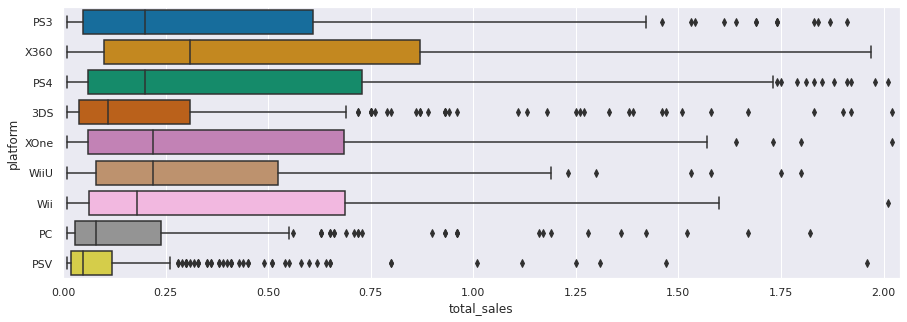

In [18]:
plt.figure(figsize = (15,5))
sns.boxplot(data=df_actual, x='total_sales', y='platform')
plt.xlim(df['total_sales'].min(),df['total_sales'].quantile(0.95))

<font color='DarkBlue'> 
📌 Визуально можно определить, что у платформы PS больше, чем у остальных, выбивающихся значений, то есть игр с большим количеством продаж. Также у всех медиана находится ближе к первому квартилю, соответственно продуктов с меньшим количеством продаж больше. В среднем количество продаж у большинства игр различных платформ одинаковое, за исключением PSV, а также в меньшей степени PC и 3DS, у которых достаточно малое их количество по сравлению с остальными <br>    
📌 Для большей информативности можно построить график violinplot по тем же данным <br>       
</font>

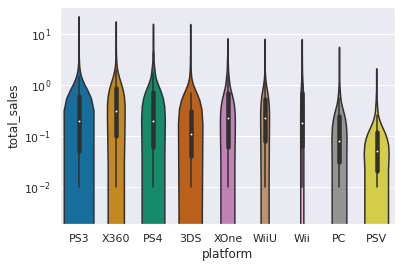

In [19]:
sns.violinplot(data=df_actual, x='platform', y='total_sales', scale='count')
plt.yscale('log')

<font color='DarkBlue'> 
📌 Заметно, что у графика для платформы PS3 площадь большая, значит игр выпущено больше, чем у остальных. Также много продуктов для PS4, 3DS и PSV, но у PSV мало продаж, так как график опущен. Продажи большинства выпущенных игр для всех платформ распределены достаточно равномерно, за исключением их выдающихся значений с большим количеством продаж в верхней части графика <br>    
📌 Можно рассмотреть, как влияют на продажи внутри одной популярной платформы XBoxOne отзывы пользователей и критиков, построить диаграммы рассеяния и посчитать корреляцию между отзывами и продажами <br>       
</font>

,critic_score,user_score,total_sales
critic_score,1.000000,0.47018,0.374138
user_score,0.470180,1.00000,-0.094160
total_sales,0.374138,-0.09416,1.000000


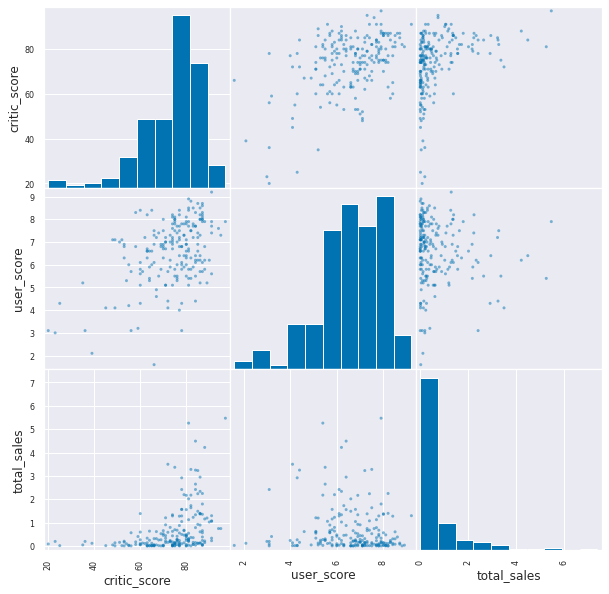

In [20]:
pd.plotting.scatter_matrix(df_actual[df_actual['platform'] == 'XOne'][['critic_score', 'user_score', 'total_sales']], figsize=(10,10))
df_actual[df_actual['platform'] == 'XOne'][['critic_score', 'user_score', 'total_sales']].corr()
#print('Корреляция между оценками критиков и количеством продаж игр:', df_actual[df_actual['platform'] == 'XOne']['critic_score'].corr(df_actual[df_actual['platform'] == 'XOne']['total_sales']))

<font color='DarkBlue'> 
📌 Оценки критиков наиболее актуальные и информативные, прослеживается несильная зависимость при небольших оценках и значительная при высоких. Причины - количество критиков очень слабо коррелируется с количеством продаж, а количесво пользователей, наоборот: чем популярнее продукт, тем больше пользователей с совершенно разными мнениями. Также прослеживается линейная зависимость между оценками критиков и пользователей, но присутствует большой разброс значений. По гистограммам можно заметить, что оценки критиков в основном более положительные, чем у пользователей <br>    
📌 Дополнительно для более детального изучения можно построить график зависимости оценки критиков от количества продаж <br>     
</font>

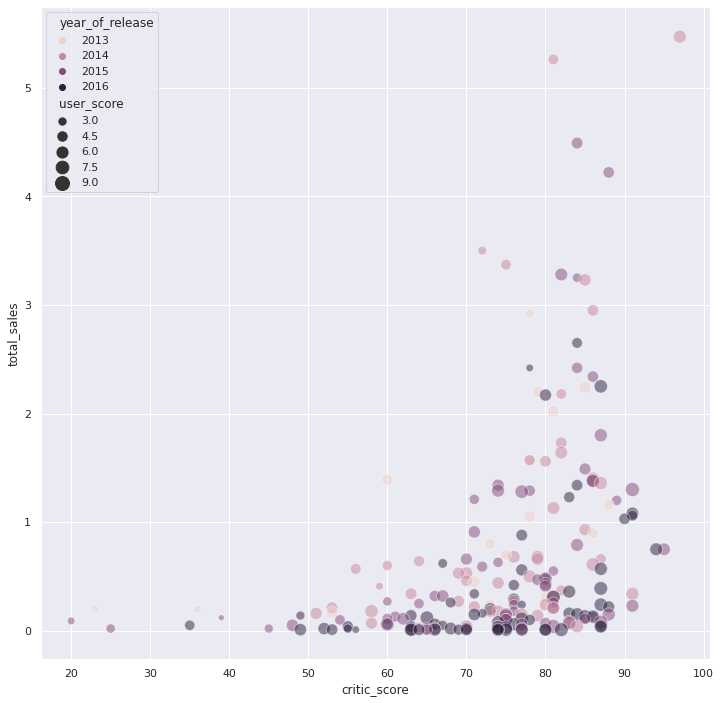

In [21]:
plt.figure(figsize = (12,12))
sns.scatterplot(data=df_actual[df_actual['platform'] == 'XOne'], x='critic_score', y='total_sales', size='user_score', sizes=(20, 200), alpha=0.5, hue='year_of_release')
plt.show()

<font color='DarkBlue'> 
📌 Можно сравнить полученные выводы с продажами игр на других платформах, по прежнему построив диаграммы рассеяния и посчитав корреляцию между отзывами и продажами <br>         
</font>

3DS - общие продажи, млн.: 195.8000030517578


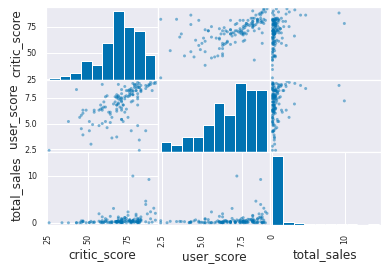

,critic_score,user_score,total_sales
critic_score,1.000000,0.583068,0.294372
user_score,0.583068,1.000000,0.217304
total_sales,0.294372,0.217304,1.000000


PC - общие продажи, млн.: 62.64999771118164


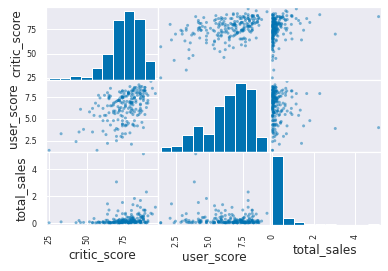

,critic_score,user_score,total_sales
critic_score,1.000000,0.469816,0.232299
user_score,0.469816,1.000000,-0.127610
total_sales,0.232299,-0.127610,1.000000


PS3 - общие продажи, млн.: 288.7900085449219


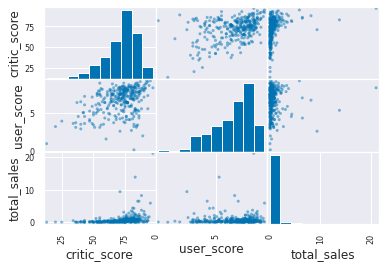

,critic_score,user_score,total_sales
critic_score,1.000000,0.405396,0.307251
user_score,0.405396,1.000000,0.007831
total_sales,0.307251,0.007831,1.000000


PS4 - общие продажи, млн.: 314.1400146484375


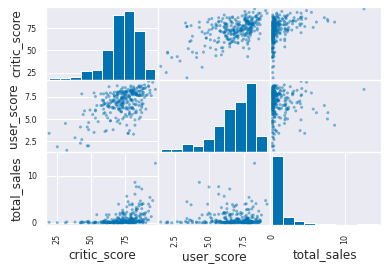

,critic_score,user_score,total_sales
critic_score,1.000000,0.562445,0.391644
user_score,0.562445,1.000000,-0.021589
total_sales,0.391644,-0.021589,1.000000


PSV - общие продажи, млн.: 49.439998626708984


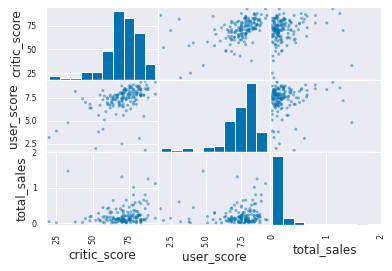

,critic_score,user_score,total_sales
critic_score,1.000000,0.477662,0.150226
user_score,0.477662,1.000000,0.047773
total_sales,0.150226,0.047773,1.000000


Wii - общие продажи, млн.: 35.369998931884766


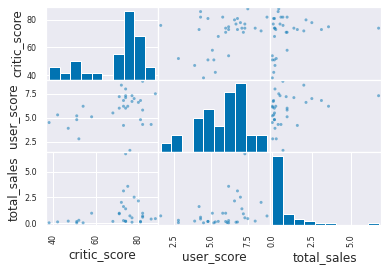

,critic_score,user_score,total_sales
critic_score,1.000000,0.379729,0.246507
user_score,0.379729,1.000000,0.307441
total_sales,0.246507,0.307441,1.000000


WiiU - общие продажи, млн.: 82.19000244140625


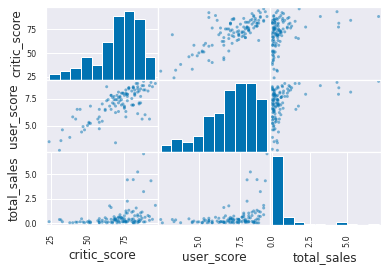

,critic_score,user_score,total_sales
critic_score,1.000000,0.755437,0.327304
user_score,0.755437,1.000000,0.367253
total_sales,0.327304,0.367253,1.000000


X360 - общие продажи, млн.: 236.5399932861328


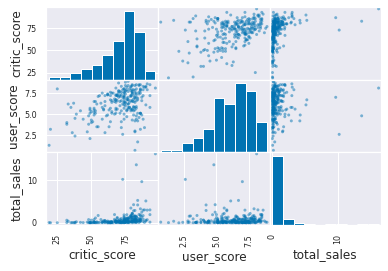

,critic_score,user_score,total_sales
critic_score,1.000000,0.394727,0.326873
user_score,0.394727,1.000000,0.011471
total_sales,0.326873,0.011471,1.000000


XOne - общие продажи, млн.: 159.3199920654297


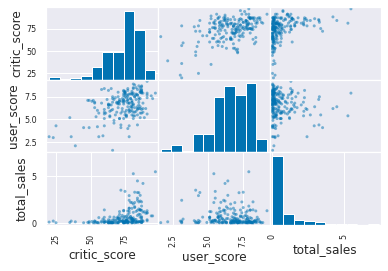

,critic_score,user_score,total_sales
critic_score,1.000000,0.47018,0.374138
user_score,0.470180,1.00000,-0.094160
total_sales,0.374138,-0.09416,1.000000


In [22]:
cnt = 0
for i in df_actual_platform:
    print(df_actual_platform.index[cnt], '- общие продажи, млн.:', i)
    pd.plotting.scatter_matrix(df_actual[df_actual['platform'] == df_actual_platform.index[cnt]][['critic_score', 'user_score', 'total_sales']])
    plt.show()
    display(df_actual[df_actual['platform'] == df_actual_platform.index[cnt]][['critic_score', 'user_score', 'total_sales']].corr())
    cnt += 1

<font color='DarkBlue'> 
📌 Данные зависимости и, соответственно, выводы аналогичны. Оценки пользователей и критиков распределены межу собой почти линейно, оценки критиков более информативны, чем оценки пользователей в плане предсказания количества продаж. При большей популярности игр это более заметно, также сильнее прослеживается зависимость оценок критиков, а пользователей - слабее. В рассматриваемых платформах высокие и низкие оценки критиков и пользователей распределены почти одинаково <br>         
📌 Можно обратить внимание на общее распределение игр по жанрам, построив круговые диаграммы с указанием их долей и диаграмму рассеяния с соответствующими осями <br>     
</font>

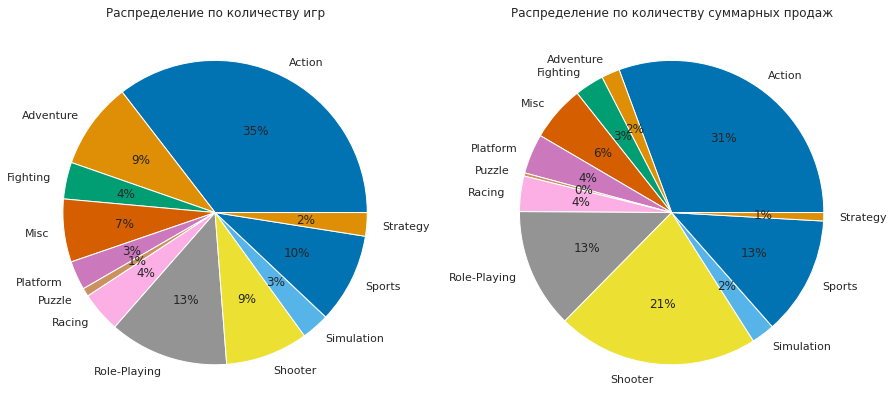

In [23]:
_, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].set_title('Распределение по количеству игр')
ax[0].pie(df_actual.groupby('genre')['name'].count(), labels=df_actual.groupby('genre')['name'].count().index, autopct="%.0f%%");
ax[1].set_title('Распределение по количеству суммарных продаж')
ax[1].pie(df_actual.groupby('genre')['total_sales'].sum(), labels=df_actual.groupby('genre')['total_sales'].sum().index, autopct="%.0f%%");

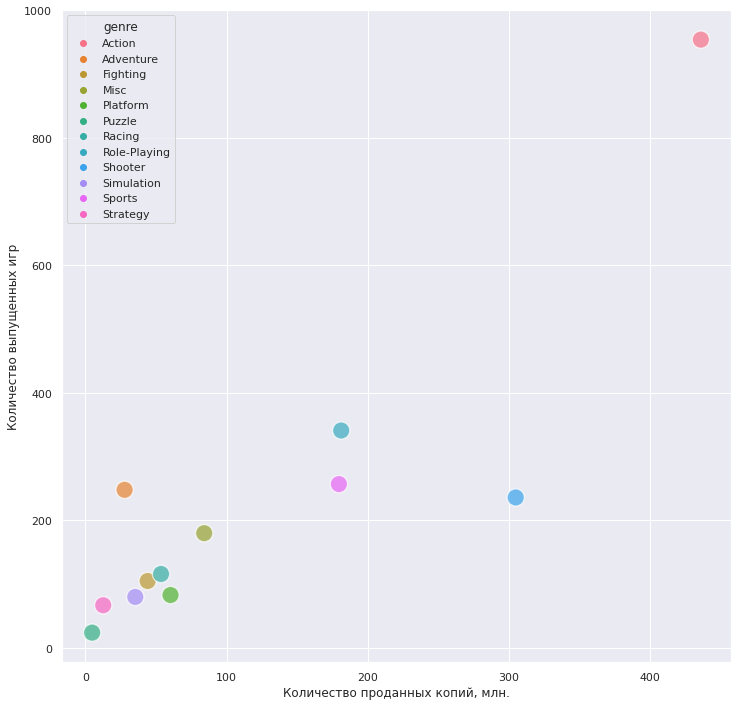

In [24]:
plt.figure(figsize = (12,12))
sns.scatterplot(data=df_actual.groupby('genre')['total_sales'].agg(['sum','count']), x='sum', y='count', s=300, alpha=0.7, hue='genre')
plt.xlabel('Количество проданных копий, млн.')
plt.ylabel('Количество выпущенных игр')
plt.show()

<font color='DarkBlue'> 
📌 Жанр Shooter является самым прибыльным, исходя из данных о количестве проданных копий. Жанр Adventure, соответственно, менее прибыльный. Остальные приблизительно одинаково прибыльны. Самым распространенным является жанр Action. Жанры с наибольшим и наименьшим количеством выпущенных игр сильно не выделяются в отношении аномального количества продаж. Жанры с высокими продажами ясно выделяются среди остальных - это Action и Shooter. Самым непопулярным жанром игр является Puzzle <br>           
</font>

## Анализ рынков регионов

<font color='DarkBlue'> 
📌 В дальнейшем анализе нужно учитывать распределения для пользователей каждого региона <br>     
📌 Необходимо выявить самые популярные платформы (топ-5) и описать их различия в долях продаж с использованием круговых диаграмм <br>  
</font>

platform
X360    140.050003
PS4     108.739998
PS3     103.379997
XOne     93.120003
3DS      56.150002
Name: na_sales, dtype: float32

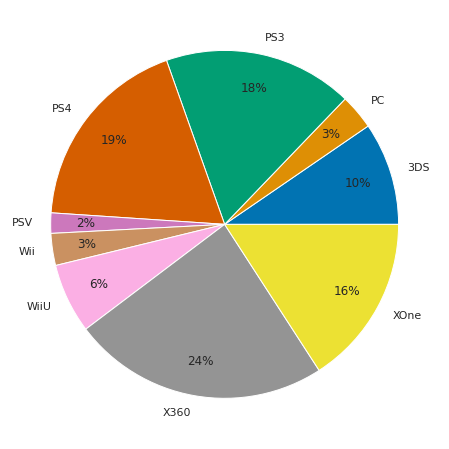

platform
PS4     141.089996
PS3     106.860001
X360     74.519997
XOne     51.590000
3DS      42.849998
Name: eu_sales, dtype: float32

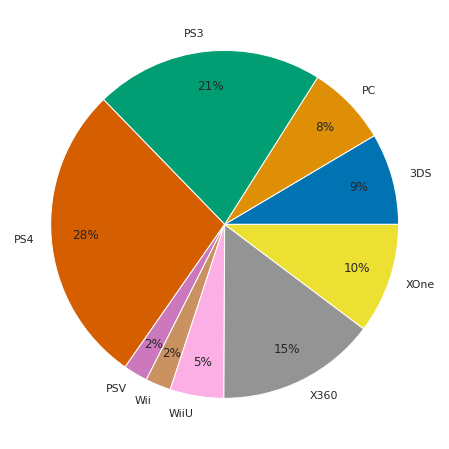

platform
3DS     87.839996
PS3     35.290001
PSV     21.110001
PS4     15.960000
WiiU    13.010000
Name: jp_sales, dtype: float32

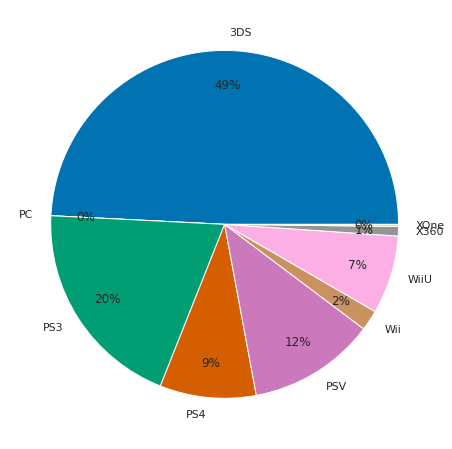

In [25]:
for i in ['na_sales','eu_sales','jp_sales']:
    display(df_actual.groupby('platform')[i].sum().sort_values(ascending=False).head())
    plt.figure(figsize = (8,8))
    plt.pie(df_actual.groupby('platform')[i].sum(), labels=df_actual.groupby('platform')[i].sum().index, pctdistance = 0.8, autopct="%.0f%%")
    plt.show()

<font color='DarkBlue'> 
📌 Самые популярные платформы в Северной Америке - это XBox и PS, которые занимают значительную долю рынка. Продаж в Америке немного больше, чем в Европе, где, в свою очередь, больше чем в Японии в соответствии с количеством населения в соответствующих районах <br>     
📌 Самая популярная платформа в Европе - это PS. Здесь заметна концентрация продаж игр новейших платформ. Доля игр для ПК больше,чем в предыдущей области. В выше перечисленных регионах самая популярная портативная консоль - это 3DS <br>  
📌 Самые популярные платформы в Японии - это PS, причем более ранних версий, чем в других регионах, и портативные игровые платформы WiiU, PSV и, в особенности, 3DS. Следовательно, в Японии доля игр для карманных платформ намного больше, а для ПК практически отсутствует <br>  
📌 Далее необходимо определить самые популярные жанры (топ-5) также с использованием круговых диаграмм и пояснить результат их сравнения <br>  
</font>

genre
Action          177.179993
Shooter         144.809998
Sports           81.379997
Role-Playing     60.759998
Misc             38.130001
Name: na_sales, dtype: float32

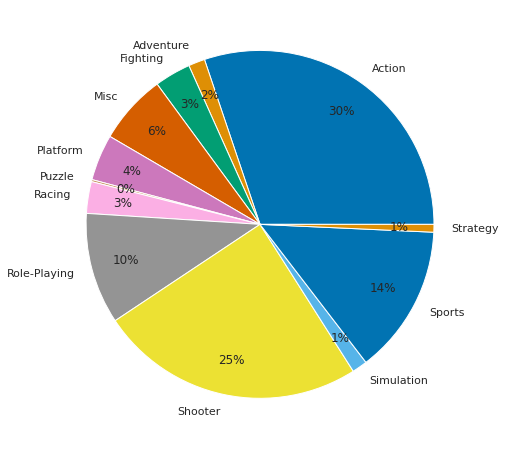

genre
Action          158.619995
Shooter         113.489998
Sports           68.839996
Role-Playing     46.810001
Racing           27.290001
Name: eu_sales, dtype: float32

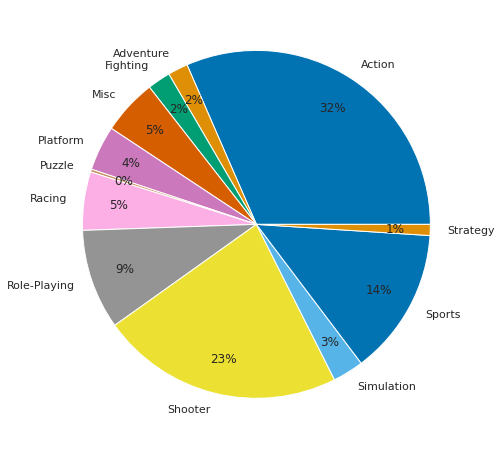

genre
Role-Playing    59.220001
Action          49.180000
Misc            12.450000
Simulation      10.349999
Shooter          9.230000
Name: jp_sales, dtype: float32

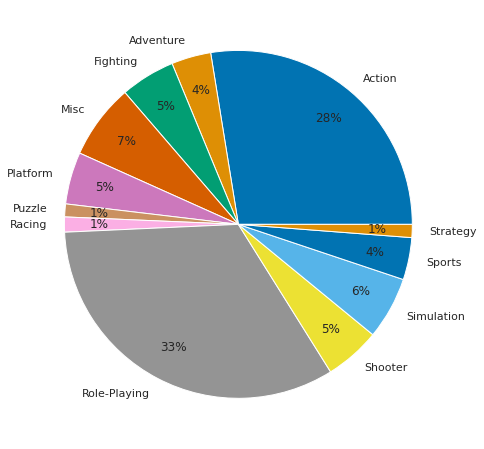

In [26]:
for i in ['na_sales','eu_sales','jp_sales']:
    display(df_actual.groupby('genre')[i].sum().sort_values(ascending=False).head())
    plt.figure(figsize = (8,8))
    plt.pie(df_actual.groupby('genre')[i].sum(), labels=df_actual.groupby('genre')[i].sum().index, pctdistance = 0.8, autopct="%.0f%%")
    plt.show()

<font color='DarkBlue'> 
📌 Самые популярные жанры в Северной Америке - это Action, Shooter и Sports, которые занимают значительную долю рынка <br>     
📌 Самые популярные жанры в Европе - это также Action, Shooter и Sports, график похож на предыдущий <br>  
📌 Самые популярные жанры в Японии - это Action и Role-Playing, распределение долей остальных жанров приблизительно одинаково. Японцы,скорее всего, предпочитают более длительные для прохождения игры <br>  
📌 Требуется обозначить, влияет ли рейтинг ESRB на продажи в отдельном регионе <br>  
</font>

rating
M          242.240005
E          117.209999
Unknown     80.120003
E10+        77.540001
T           70.089996
Name: na_sales, dtype: float32

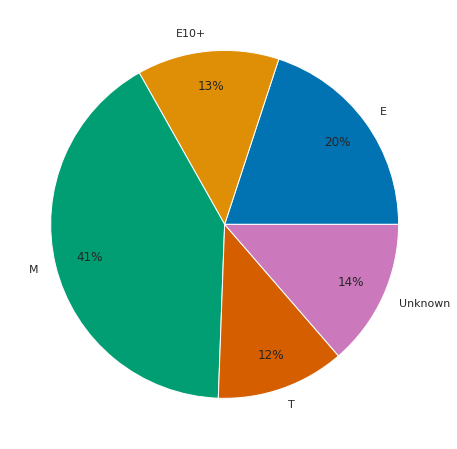

rating
M          205.949997
E          114.129997
Unknown     68.330002
E10+        57.630001
T           57.090000
Name: eu_sales, dtype: float32

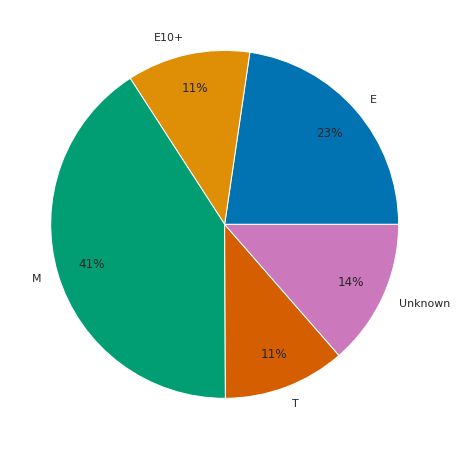

rating
Unknown    90.659996
E          28.580000
T          28.539999
M          22.160000
E10+        8.570000
Name: jp_sales, dtype: float32

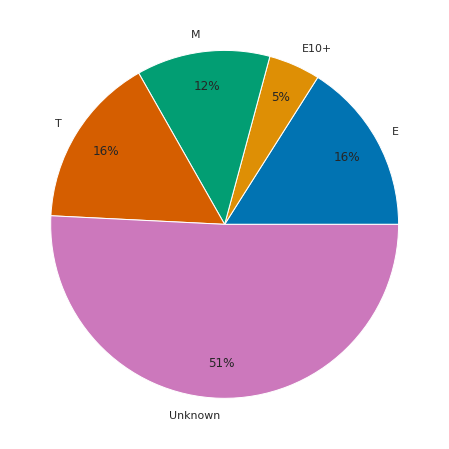

In [27]:
for i in ['na_sales','eu_sales','jp_sales']:
    display(df_actual.groupby('rating')[i].sum().sort_values(ascending=False))
    plt.figure(figsize = (8,8))
    plt.pie(df_actual.groupby('rating')[i].sum(), labels=df_actual.groupby('rating')[i].sum().index, pctdistance = 0.8, autopct="%.0f%%")
    plt.show()

<font color='DarkBlue'> 
📌 Разброс рейтингов по продажам игр приблизительно одинаков в Европе и Америке, больше продаж игр с рейтингом M. В Японии меньше продаж игр с рейтингом M, больше с рейтингом T, то есть для более младшей категории населения, и большое количество продаж игр без соответствующей категории, скорее всего относящихся к менее популярным в мире портативным игровым консолям и играм без оценок пользователей и критиков. В Японии также предположительно сильнее выражено влияние цензуры <br>   
📌 Далее можно удостовериться в том, что игр с отсутствующим рейтингом больше, чем любых других, как и меньшее количество продаж продуктов рассматриваемой категории, а также больше игр с отсутствующим рейтингом для портативных игровых платформ PSV и 3DS <br>    
</font>

platform
PSV     250
3DS     241
PS3     170
PS4     102
PC       60
X360     39
XOne     38
WiiU     32
Wii      17
Name: name, dtype: int64
genre
Action          347
Adventure       169
Role-Playing    134
Misc             94
Sports           44
Simulation       37
Strategy         36
Shooter          30
Fighting         22
Racing           19
Puzzle            9
Platform          8
Name: name, dtype: int64


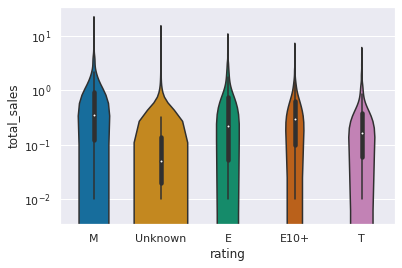

In [28]:
print(df_actual[df_actual['rating'] == 'Unknown'].groupby('platform')['name'].count().sort_values(ascending=False))
print(df_actual[df_actual['rating'] == 'Unknown'].groupby('genre')['name'].count().sort_values(ascending=False))
sns.violinplot(data=df_actual, x='rating', y='total_sales', scale='count')
plt.yscale('log')

## Проверка гипотез

<font color='DarkBlue'> 
📌 Необходимо проверить гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые <br> 
📌 Гипотеза является нулевой, так как в определении превалирует операция сравнения. Сначала необходимо сгруппировать агрегированные значения оценок по платформам (их количество, средняя оценка и стандартное отклонение) <br>   
</font> 

In [29]:
df_hyp_1 = round(df_actual[df_actual['platform'].isin(['XOne','PC'])].groupby('platform')['user_score'].agg(['count','mean','std']), 2)
df_hyp_1

,count,mean,std
platform,,,
PC,210,6.43,1.67
XOne,206,6.60,1.38


<font color='DarkBlue'> 
📌 Заметно, что оценки приблизительно одинаковы, как и их количество <br>     
📌 Далее можно визуализировать графики нормальных распределений оценок пользователей для каждой платформы, используя правило 3 сигм <br>   
</font> 

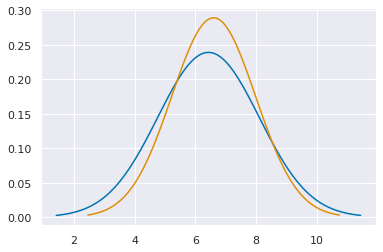

In [30]:
for i in range(len(df_hyp_1)):
    plt.plot(np.linspace(df_hyp_1['mean'][i] - 3 * df_hyp_1['std'][i], df_hyp_1['mean'][i] + 3 * df_hyp_1['std'][i], num=101),scipy.stats.norm.pdf(np.linspace(df_hyp_1['mean'][i] - 3 * df_hyp_1['std'][i], df_hyp_1['mean'][i] + 3 * df_hyp_1['std'][i], num=101), df_hyp_1['mean'][i], df_hyp_1['std'][i]))
plt.show()

<font color='DarkBlue'> 
📌 Из графика заметно, что распределения несильно различаются, необходимо проверить нулевую гипотезу, с помощью сравнения средних двух независимых генеральных совокупностей, относящихся к совершенно разным платформам и, соответственно, независимым оценкам пользователей. Нулевая гипотеза повествует о совпадении рассматриваемых совокупностей. Критичный параметр 'альфа' стандартно можно принять раным 5%, определяющим, что в разброс значений для утверждения нулевой гипотезы не входят области по 2.5% с каждой стороны графика. В случае сравнения генеральных совокупностей правило вхождения строже в отличие от анализа относительно заданного параметра в связи с наличием неопределенности разброса отклонений <br> 
</font> 

In [31]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - можно отвергнуть гипотезу
results = scipy.stats.ttest_ind(df_actual[(df_actual['platform'] == 'XOne') & (~df_actual['user_score'].isna())]['user_score'], df_actual[(df_actual['platform'] == 'PC') & (~df_actual['user_score'].isna())]['user_score'], equal_var = False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергается нулевая гипотеза")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.25135318639877235
Не получилось отвергнуть нулевую гипотезу


<font color='DarkBlue'> 
📌 Нулевая гипотеза не отвергнута, соответственно, средние пользовательские рейтинги платформ Xbox One и PC одинаковые. P-value почти 25%, соответственно, даже при большем значении 'альфа' указанная в задании гипотеза будет верна <br> 
📌 Теперь необходимо проверить следующую гипотезу: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Соответственно, нулевой будет являться обратная: средние пользовательские рейтинги жанров Action и Sports одинаковы <br>
📌 Как и в предыдущем случае, нужно сгруппировать агрегированные значения оценок по игровым жанрам <br>
</font> 

In [32]:
df_hyp_2 = round(df_actual[df_actual['genre'].isin(['Action','Sports'])].groupby('genre')['user_score'].agg(['count','mean','std']), 2)
df_hyp_2

,count,mean,std
genre,,,
Action,593,6.86,1.37
Sports,216,5.42,1.70


<font color='DarkBlue'> 
📌 Оценки немного выше у игр жанра Action. Количество оценок соответствующего жанра тоже больше. Более точное значение можно получить при большем количестве экспериментов, в текущем случае, выпущенных игр с обозначенными оценками <br> 
📌 Далее можно визуализировать графики нормальных распределений оценок пользователей для каждого жанра из рассматриваемой выборки по заданной группировке <br>   
</font> 

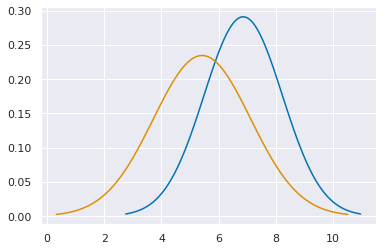

In [33]:
for i in range(len(df_hyp_2)):
    plt.plot(np.linspace(df_hyp_2['mean'][i] - 3 * df_hyp_2['std'][i], df_hyp_2['mean'][i] + 3 * df_hyp_2['std'][i], num=101),scipy.stats.norm.pdf(np.linspace(df_hyp_2['mean'][i] - 3 * df_hyp_2['std'][i], df_hyp_2['mean'][i] + 3 * df_hyp_2['std'][i], num=101), df_hyp_2['mean'][i], df_hyp_2['std'][i]))
plt.show()

<font color='DarkBlue'> 
📌 На графике явно прослеживается факт того, что распределения различны <br> 
📌 Необходимо проверить альтернативную гипотезу, являющуюся двухсторонней, с помощью сравнения средних двух независимых генеральных совокупностей, относящихся к пользователям разных жанров. Соответственно, нулевая гипотеза повествует об обратном, совпадении рассматриваемых совокупностей. Критичный параметр 'альфа' стандартно можно принять раным 5%, определяющим, что в разброс значений для утверждения нулевой гипотезы не входят области по 2.5% с каждой стороны графика
</font> 

In [34]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - можно отвергнуть гипотезу
results = scipy.stats.ttest_ind(df_actual[(df_actual['genre'] == 'Action') & (~df_actual['user_score'].isna())]['user_score'], df_actual[(df_actual['genre'] == 'Sports') & (~df_actual['user_score'].isna())]['user_score'], equal_var = False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергается нулевая гипотеза")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.524832976256105e-24
Отвергается нулевая гипотеза


<font color='DarkBlue'> 
📌 Нулевая гипотеза отвергнута, соответственно, исходная альтернативная верна: средние пользовательские рейтинги жанров Action и Sports разные. P-value намного меньше обозначенных 5%, соответствующих принятому стандарту, значит данные совокупностей распределены различным образом, значит совпадение их значений может быть только случайностью <br> 
</font> 

## Общий вывод

<font color='DarkBlue'> 
📌 В ходе осуществленных исследований проведен предварительный анализ продуктов для игровых консолей и выявлено: <br>  
    - предоставленные данные умеренного качества, содержится небольшое количество пропусков и ошибок, присутсвуют как технические ошибки в корректности данных, например, значения 'tbd' в поле рейтинга продукта при наличии пустых полей, и их отсутствии, например, года выпуска продукта или рейтинга при его наличии у той же игры на другой платформе, так и связанные с явлением человеческого фактора, например, релиза игры еще не вышедшей платформы или отсутствия наименования игр <br>
    - улучшено качество исходного датасета, удалены строки без указания наименования игр, заполнены отсутствующие значения условным принятым параметром для обозначения пропусков, усреднены аномальные и некоторые пропущенные значения в зависимости от типа платформы для продукта, создан готовый алгоритм для следующих преобразований исходных данных. Добавлен столбец с агрегированными значениями параметров, преобразованы типы данных для последующего анализа <br>
    - определено, что оценки критиков больше влияют на продажи, вероятно, их мнение учитывается при выборе и покупке, и наиболее точны в отношении популярности продуктов, чем пользовательские оценки <br>
    - наиболее прибыльным игровым жанром является Shooter. Самым продаваемым является Action, соответственно, присутствует большая конкуренция, а в Японии также RPG. Самой популярной и перспективной платформой является PS4 и в немного меньшей степени XOne, в Японии вдобавок достаточно популярны портативные игровые платформы, но нужно учитывать, что их поколения также быстро меняются <br>
    - проанализированы гипотезы: 'средние пользовательские рейтинги платформ Xbox One и PC одинаковые' не отвергнута, 'средние пользовательские рейтинги жанров Action и Sports разные' верна <br>
</font>     